## Introduction

This is a jupyter notebook an interactive "literate" programming interface/gui. you can read more on what are jupyter notebooks and the basics of working with them in the [tutorial](https://realpython.com/jupyter-notebook-introduction/) one our of many

In [1]:
!pip install pandas scikit-learn sklearn matplotlib seaborn
# Note: when we need to run a command from the terminal which isn't a pure python command we'll prefix with !

Looking in indexes: https://pypi.org/simple, https://repo.fury.io/RJN6sFDizvNyhqzPBvun/idoivri/
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [3]:
# Pandas has a concept of a dataframe, one can initialize a dataframe from csv/json most other kind of tables. 
# and yes, from a remote uri that has this data also 
# df = pd.read_csv(dataset_uri)
df = pd.read_csv('./kovid19-korea-processed.csv')

In [4]:
# Pandas is built for exploring datasets, Lets take a look
print(df.shape)
df.describe()

(2771, 22)


,Unnamed: 0,patient_id,global_num,birth_year,age,infection_order,infected_by,contact_number,is_dead
count,2771.000000,2.771000e+03,1664.000000,2414.000000,2414.000000,31.000000,6.500000e+02,517.000000,2771.000000
mean,1385.000000,3.748468e+09,5558.304087,1974.374896,45.625104,2.387097,2.647075e+09,20.849130,0.019127
std,800.063123,2.209410e+09,3142.434246,20.284689,20.284689,1.453213,1.687647e+09,81.595859,0.136995
min,0.000000,1.000000e+09,1.000000,1916.000000,0.000000,1.000000,1.000000e+09,0.000000,0.000000
25%,692.500000,1.400000e+09,2693.500000,1960.000000,27.000000,1.000000,1.200000e+09,2.000000,0.000000
50%,1385.000000,4.100000e+09,6344.500000,1974.000000,46.000000,2.000000,2.000000e+09,5.000000,0.000000
75%,2077.500000,6.001001e+09,8268.250000,1993.000000,60.000000,3.000000,4.100000e+09,15.000000,0.000000
max,2770.000000,7.000000e+09,9652.000000,2020.000000,104.000000,6.000000,6.100000e+09,1160.000000,1.000000


In [5]:
# Also we can take a peek inside
df.head(10)

,Unnamed: 0,patient_id,global_num,sex,birth_year,age,country,province,city,disease,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_place,age_group,is_dead
0,0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,...,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,Abroad,"(51, 60)",0
1,1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,...,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,Abroad,"(31, 40)",0
2,2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,...,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,Domestic,"(51, 60)",0
3,3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,...,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,Abroad,"(21, 30)",0
4,4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,...,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,Domestic,"(21, 30)",0
5,5,1000000006,10.0,female,1966.0,54.0,Korea,Seoul,Jongno-gu,NaN,...,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released,Domestic,"(51, 60)",0
6,6,1000000007,11.0,male,1995.0,25.0,Korea,Seoul,Jongno-gu,NaN,...,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released,Domestic,"(21, 30)",0
7,7,1000000008,13.0,male,1992.0,28.0,Korea,Seoul,etc,NaN,...,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released,Abroad,"(21, 30)",0
8,8,1000000009,19.0,male,1983.0,37.0,Korea,Seoul,Songpa-gu,NaN,...,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released,Abroad,"(31, 40)",0
9,9,1000000010,21.0,female,1960.0,60.0,Korea,Seoul,Seongbuk-gu,NaN,...,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released,Domestic,"(61, 70)",0


### Feeding the  predictor
#### Who by fire and who by sword

* We would like to use only relevant stuff

* So we'll clean the df from less relevant columns and focus on city, sex, age, infection_place

In [6]:
# Here we copy only relevant columns from the df
# We've added province here.. because it might be useful is city has a too big variance
cleaned_df = df[['is_dead','age','sex','city','infection_place', 'province']]

In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
is_dead            2771 non-null int64
age                2414 non-null float64
sex                2765 non-null object
city               2703 non-null object
infection_place    2771 non-null object
province           2771 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 130.0+ KB


In [8]:
# For the regressor to work we'll clean out the rows with missing data
cleaned_df = cleaned_df[cleaned_df.age.notnull()]
cleaned_df = cleaned_df[cleaned_df.city.notnull()]
cleaned_df = cleaned_df[cleaned_df.sex.notnull()]
# Note: that sometimes, we'll try to fill the missing data instead
cleaned_df.info()
# To verify that all columns have the same number of rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2768
Data columns (total 6 columns):
is_dead            2369 non-null int64
age                2369 non-null float64
sex                2369 non-null object
city               2369 non-null object
infection_place    2369 non-null object
province           2369 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 129.6+ KB


### Massaging the data to numbers

* Before we can actually run a model on it in needs to be numbers, so we'll turn some things into boolean numbers

* We can see on the info above that lot's of colums are not int/float type so we'll try to work with them

* City might be tricky, we'll see the variance first

In [9]:
def is_male(sex):
    
    if sex.lower() == 'male':
        return 1
    return 0
    
cleaned_df['is_male'] = cleaned_df.sex.apply(is_male)
cleaned_df = cleaned_df.drop(['sex'], axis=1)

In [10]:
# I think Infection place is also practicaly a boolean so we can apply the same trick
# But let's check the variance first
cleaned_df.infection_place.value_counts()

Abroad      931
UnKnown     757
Domestic    681
Name: infection_place, dtype: int64

In [11]:
# Ok, so it unknown is pretty big, maybe it doesn't matter match
# While there are other techniques for now I'll drop it

In [12]:
cleaned_df = cleaned_df.drop(['infection_place'], axis=1)

In [13]:
# Let's look what we got now
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2768
Data columns (total 5 columns):
is_dead     2369 non-null int64
age         2369 non-null float64
city        2369 non-null object
province    2369 non-null object
is_male     2369 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 111.0+ KB


In [14]:
# So city is still tricky - let's check the variance to see how wide is it
cleaned_df.city.value_counts()

Gyeongsan-si       614
Seongnam-si        109
Cheonan-si         102
Bonghwa-gun         70
Bucheon-si          67
Yongin-si           52
Chilgok-gun         50
Andong-si           49
Gyeongju-si         44
Uiseong-gun         41
Gangnam-gu          38
Suwon-si            37
etc                 36
Dongnae-gu          32
Guro-gu             30
Nam-gu              28
Dongdaemun-gu       26
Changwon-si         26
Gimcheon-si         25
Gangseo-gu          25
Gwanak-gu           24
Songpa-gu           24
Gunpo-si            24
Eunpyeong-gu        21
Dongjak-gu          21
Seocho-gu           21
Nowon-gu            20
Wonju-si            19
Yeongdeungpo-gu     19
Geochang-gun        19
                  ... 
Jinju-si             3
Ulju-gun             3
Gunsan-si            3
Yangsan-si           3
Hongseong-gun        2
Jeungpyeong-gun      2
Cheongsong-gun       2
Goseong-gun          2
Suseong-gu           2
Sasang-gu            2
Mungyeong-si         2
Danyang-gun          1
Suncheon-si

In [15]:
# Ok. lots of variance. let's try province
cleaned_df.province.value_counts()

Gyeongsangbuk-do     925
Gyeonggi-do          466
Seoul                434
Chungcheongnam-do    128
Busan                115
Gyeongsangnam-do      92
Incheon               59
Chungcheongbuk-do     44
Ulsan                 39
Daegu                 21
Gangwon-do            19
Jeollabuk-do          13
Jeollanam-do           9
Jeju-do                5
Name: province, dtype: int64

In [16]:
# So we'll drop cities and see if province is interesting 
cleaned_df = cleaned_df.drop(axis=1, columns=['city'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2768
Data columns (total 4 columns):
is_dead     2369 non-null int64
age         2369 non-null float64
province    2369 non-null object
is_male     2369 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 92.5+ KB


### Army of the clones
* We're still stuck with the same problem, we need numbers and province isn't a number

* BUT pandas has a dummy solution

In [17]:
dataset = pd.get_dummies(cleaned_df,['province'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2768
Data columns (total 17 columns):
is_dead                       2369 non-null int64
age                           2369 non-null float64
is_male                       2369 non-null int64
province_Busan                2369 non-null uint8
province_Chungcheongbuk-do    2369 non-null uint8
province_Chungcheongnam-do    2369 non-null uint8
province_Daegu                2369 non-null uint8
province_Gangwon-do           2369 non-null uint8
province_Gyeonggi-do          2369 non-null uint8
province_Gyeongsangbuk-do     2369 non-null uint8
province_Gyeongsangnam-do     2369 non-null uint8
province_Incheon              2369 non-null uint8
province_Jeju-do              2369 non-null uint8
province_Jeollabuk-do         2369 non-null uint8
province_Jeollanam-do         2369 non-null uint8
province_Seoul                2369 non-null uint8
province_Ulsan                2369 non-null uint8
dtypes: float64(1), int64(2), uint8(14)
m

### What just happened

It's called "one hot enconding" in ML, get_dummies replaces the "categorical" feature we've had of province to a list of columns each a boolean

In [18]:
# We've now got 17 columns. or "features" in ML Lingo
# I've been told a at least 50 items per feature, let's see if we have enough

print(len(dataset)/len(dataset.columns))

139.35294117647058


In [19]:
# So we're good (I think)

In [20]:
# X is the data we'll run on, y is the expected results
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,:1].values
feature_names = dataset.iloc[:,1:].columns
print(feature_names)

Index(['age', 'is_male', 'province_Busan', 'province_Chungcheongbuk-do',
       'province_Chungcheongnam-do', 'province_Daegu', 'province_Gangwon-do',
       'province_Gyeonggi-do', 'province_Gyeongsangbuk-do',
       'province_Gyeongsangnam-do', 'province_Incheon', 'province_Jeju-do',
       'province_Jeollabuk-do', 'province_Jeollanam-do', 'province_Seoul',
       'province_Ulsan'],
      dtype='object')


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

* What happened here?

* We've split the data and the result (is_dead) to two sets, one we'll use to train a Machine learning model. and the other to test the results

In [22]:
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
y_pred = estimator.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[469,   0],
       [  5,   0]])

### Confused? this is a confusion matrix

```python
[True positive, False Positive]
[False negative, True Negative]

```

* A common way to estimate how good a model is. see  this [wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix)for more explainations

* So The diagonal from upper left to lower right are  the good results.

[Text(133.92000000000002, 181.2, 'age <= 70.5\ngini = 0.027\nsamples = 1895\nvalue = [1869, 26]'),
 Text(66.96000000000001, 108.72, 'gini = 0.013\nsamples = 1680\nvalue = [1669, 11]'),
 Text(200.88000000000002, 108.72, 'is_male <= 0.5\ngini = 0.13\nsamples = 215\nvalue = [200, 15]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.077\nsamples = 149\nvalue = [143, 6]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.236\nsamples = 66\nvalue = [57, 9]')]

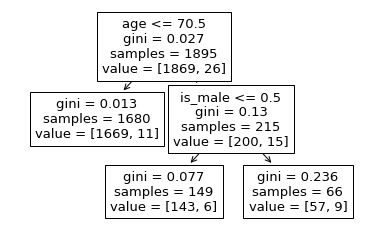

In [27]:
# Lets look at the actual tree

from sklearn import tree
tree.plot_tree(estimator, feature_names=feature_names)

### Where to continue from here
* Read more about [decision trees](https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb_ 
* Try other estimators/regressors
* Try working with the data in different ways